In [ ]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import csv
import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt

Sentimental analysis Tweets Downloaded
Total tweets:        550
Negative Tweets:     123
Postitive Tweets:    270
Neutral Tweets:      157
Positive tweets Percentage:     49.09090909090909 %
Negative Tweets Percentage:     22.363636363636363 %
Neutral Tweets Percentage:      28.545454545454547 %


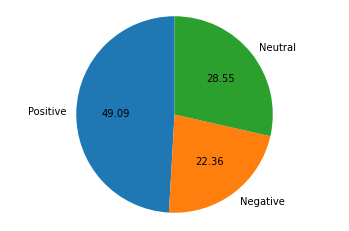

In [ ]:
import pandas as pd
Polarity=[]
Sent=[]
Sentiment=[]
neg=0
pos=0
neu=0
df=pd.read_csv("Covid_19_tweets.csv")

for value in df['tweet']:
 # print (value)
  tweet = TextBlob(value)
  p=tweet.sentiment.polarity
  #print(tweet.sentiment.polarity)
  Polarity.append(p)
  if tweet.sentiment.polarity < 0:
    Sent = "negative"
    Sentiment.append(Sent)
  elif tweet.sentiment.polarity == 0:
    Sent = "Neutral"
    Sentiment.append(Sent)
  else:
    Sent = "positive"
    Sentiment.append(Sent)
  #print(Sent)
  #print('')
  if(Sent == "negative"):
    neg=neg+1
  elif(Sent=="positive"):
    pos=pos+1
  else:
    neu=neu+1


df["Polarity"] = Polarity
df["Sentiment"] = Sentiment
df.to_csv('Sentiments.csv')

print("Sentimental analysis Tweets Downloaded")

print("Total tweets:       ",len(df.index))
print("Negative Tweets:    ",neg)
print("Postitive Tweets:   ",pos)
print("Neutral Tweets:     ",neu)


pp=pos*100/len(df.index)
np=neg*100/len(df.index)
nup=neu*100/len(df.index)


print("Positive tweets Percentage:    ",pp,"%")
print("Negative Tweets Percentage:    ",np,"%")
print("Neutral Tweets Percentage:     ",nup,"%")




pieLabels= 'Positive', 'Negative', 'Neutral'
populationShare = [pp,np,nup]
figureObject, axesObject = plotter.subplots()
# Draw the pie chart
axesObject.pie(populationShare,
               labels=pieLabels,
               autopct='%1.2f',
               startangle=90)
# Aspect ratio - equal means pie is a circl
axesObject.axis('equal')
plotter.show()



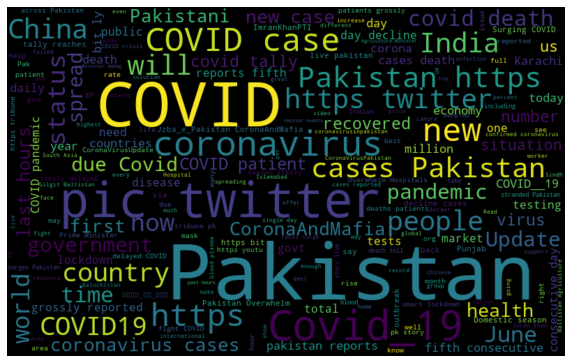

In [ ]:
all_words = ' '.join([text for text in df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]


In [ ]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


In [ ]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


In [ ]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [ ]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [ ]:
print(positive_tweet_tokens[4632])
print(positive_cleaned_tokens_list[4632])

['@xemig', 'sounds', 'still', 'like', 'a', 'good', 'idea', ':)']
['sound', 'still', 'like', 'good', 'idea', ':)']


In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)


In [ ]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_neg_words = get_all_words(negative_cleaned_tokens_list)

In [ ]:
freq_dist_neg = FreqDist(all_neg_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [ ]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]


dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(30))

Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2063.7 : 1.0
                      :) = True           Positi : Negati =    990.9 : 1.0
                    sick = True           Negati : Positi =     20.9 : 1.0
                follower = True           Positi : Negati =     20.3 : 1.0
                     sad = True           Negati : Positi =     19.1 : 1.0
                  arrive = True           Positi : Negati =     18.3 : 1.0
                    glad = True           Positi : Negati =     17.8 : 1.0
               community = True           Positi : Negati =     13.7 : 1.0
                     x15 = True           Negati : Positi =     13.6 : 1.0
                    miss = True           Negati : Positi =     11.7 : 1.0
               goodnight = True           Positi : Negati =     11.7 : 1.0
                congrats = True           Positi : Negati =     11.7 : 1.0
                      aw = True           

In [ ]:
from nltk.tokenize import word_tokenize

custom_tweet = "Some people in Pakistan hide COVID-19 symptoms, fearing stigma, and dying alone as a result. Others claim that the virus is fake and that doctors just kill patients. "
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative
